# Segmentação de clientes de um supermercado
## Análise Exploratória de Dados

Um supermercado, através de cartões de fidelidade, possui alguns dados básicos sobre seus clientes, como idade, gênero, renda anual e pontuação de gastos. Tal pontuação é algo que o supermercado atribui ao cliente com base em parâmetros definidos, como comportamento do cliente e dados de compra.

O objetivo deste projeto é segmentar os clientes com base em seus dados de compra, para que o supermercado possa entender melhor os clientes e formular estratégias de negócios de acordo.

Link original para o dataset: https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python

Estrutura de pastas do projeto:

```bash
├── README.md
├── dados
│   ├── Mall_Customers.csv
├── notebooks
│   └── projeto_supermercado_01_eda.ipynb
│   └── ...
├── reports
│   └── ...
```

In [ ]:
import pandas as pd
import matplotlib
import seaborn as sns
import numpy as np
import sklearn
from platform import python_version

bibliotecas = {
    'Pandas': pd,
    'Matplotlib': matplotlib,
    'Seaborn': sns,
    'Numpy': np,
    'Scikit-Learn': sklearn,
}

In [ ]:
print("Versões das bibliotecas:\n")
print(f'{"":-^20} | {"":-^10}')
print(f'{"Bibliotecas":^20} | {"Versões":^10}')
print(f'{"":-^20} | {"":-^10}')


for nome, biblioteca in sorted(bibliotecas.items()):
    print(f"{nome:<20} | {biblioteca.__version__:>10}")

Versões das bibliotecas:

-------------------- | ----------
    Bibliotecas      |  Versões  
-------------------- | ----------
Matplotlib           |      3.7.1
Numpy                |     1.23.5
Pandas               |      1.5.3
Scikit-Learn         |      1.2.2
Seaborn              |     0.13.1


In [ ]:
file_data = "Mall_Customers.csv"

df = pd.read_csv(file_data)
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
pd.set_option(f"display.float_format", "{:.2f}".format)
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.00,200.00,200.00,200.00
mean,100.50,38.85,60.56,50.20
std,57.88,13.97,26.26,25.82
min,1.00,18.00,15.00,1.00
25%,50.75,28.75,41.50,34.75
50%,100.50,36.00,61.50,50.00
75%,150.25,49.00,78.00,73.00
max,200.00,70.00,137.00,99.00


In [ ]:
df.describe(exclude="number")

,Gender
count,200
unique,2
top,Female
freq,112


In [ ]:
from ydata_profiling import ProfileReport

profile = ProfileReport(df)

profile.to_file("eda_supermercado.html")

O arquivo **eda_supermercado.html** pode ser encontrado na pasta reports desse repositório.

In [ ]:
df_analise = df.copy()
df_analise = df_analise.drop('CustomerID', axis=1)
df_analise.head(3)

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6


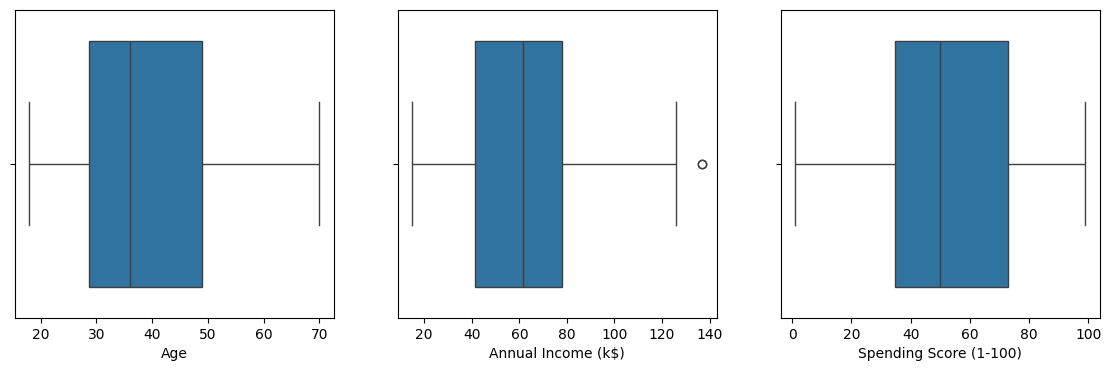

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(14, 4))

for ax, col in zip(axs, df_analise.select_dtypes('number')):
  sns.boxplot(data=df_analise, x=col, ax=ax)

plt.show()

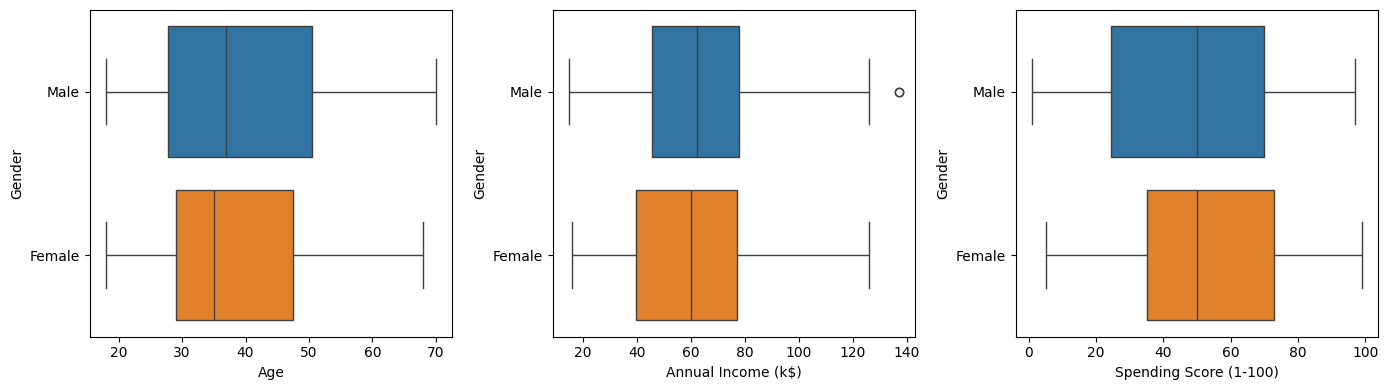

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(14, 4), tight_layout=True)

for ax, col in zip(axs, df_analise.select_dtypes('number')):
  sns.boxplot(data=df_analise, x=col, y='Gender', ax=ax, hue='Gender')

plt.show()

In [ ]:
pd.set_option("display.float_format", "{:.3f}".format)
df_analise.corr(numeric_only=True, method='spearman')

,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000,0.020,-0.345
Annual Income (k$),0.020,1.000,0.008
Spending Score (1-100),-0.345,0.008,1.000


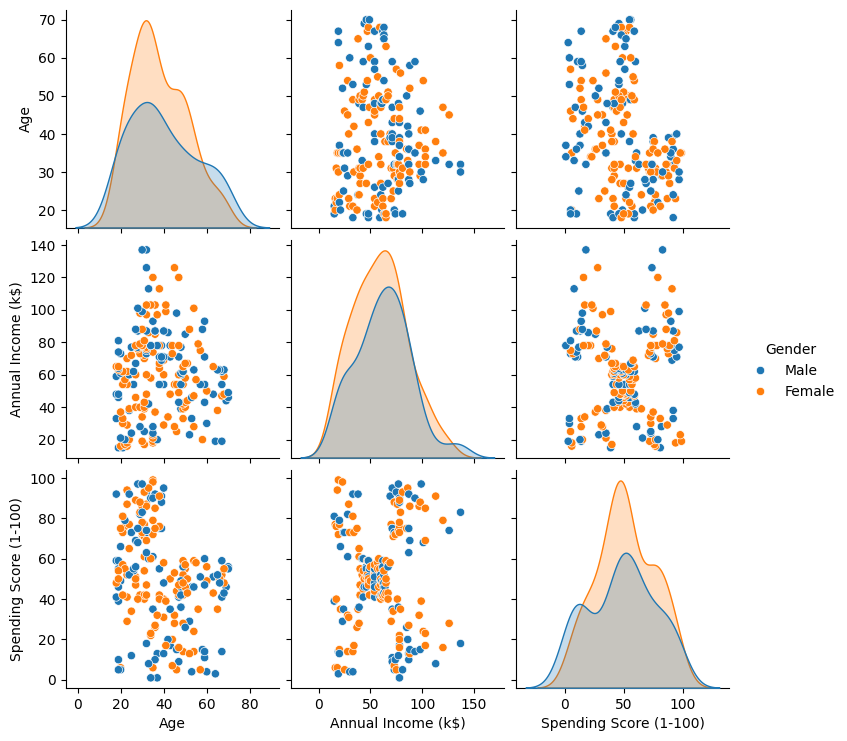

In [ ]:
sns.pairplot(df_analise, diag_kind='kde', hue='Gender');

In [ ]:
df_analise.to_csv("Mall_Customers_no_CustomerID.csv", index=False)